# Exercício 21.21 - Integração Numérica - Newton Cotes

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

Regra do Trapézio

In [2]:
def trap(f,a,b):
    return (b-a)*(f(a)+f(b))/2

Regra do Trapézio - Multiplas Aplicações

In [3]:
def multiTrap(n,f,a,b):
    s = 0
    x = np.linspace(a,b,n+1).tolist()
    for i in range(1,n):
        s += f(x[i])
    s *= 2
    s += (f(x[0]) + f(x[n]))
    s *= (b-a)/(2*n)
    return s

In [4]:
def f(x):
    return 3*math.cos(x) + 6

Regra 1/3 de Simpson

In [5]:
def simpson(f,a,b):
    s = f(a) + 4*f((a+b)/2) + f(b)
    s *= (b-a)/6
    return s

Regra 1/3 de Simpson - Múltiplas Aplicações

In [6]:
def multiSimpson(n,f,a,b):
    s = 0
    x = np.linspace(a,b,n+1).tolist()
    for i in range(1,n):
        if i % 2 == 0:
            s += 2*f(x[i])
        if i % 2 == 1:
            s += 4*f(x[i])
    s += (f(x[0]) + f(x[n]))
    s *= (b-a)/(3*n)
    return s

Regra 3/8 de Simpson

In [7]:
def simpson38(f,a,b):
    s = f(a) + 3*f(a+(a+b)/3) + 3*f(a+2*(a+b)/3) + f(b)
    s *= (b-a)/8
    return s

# Gráfico da função

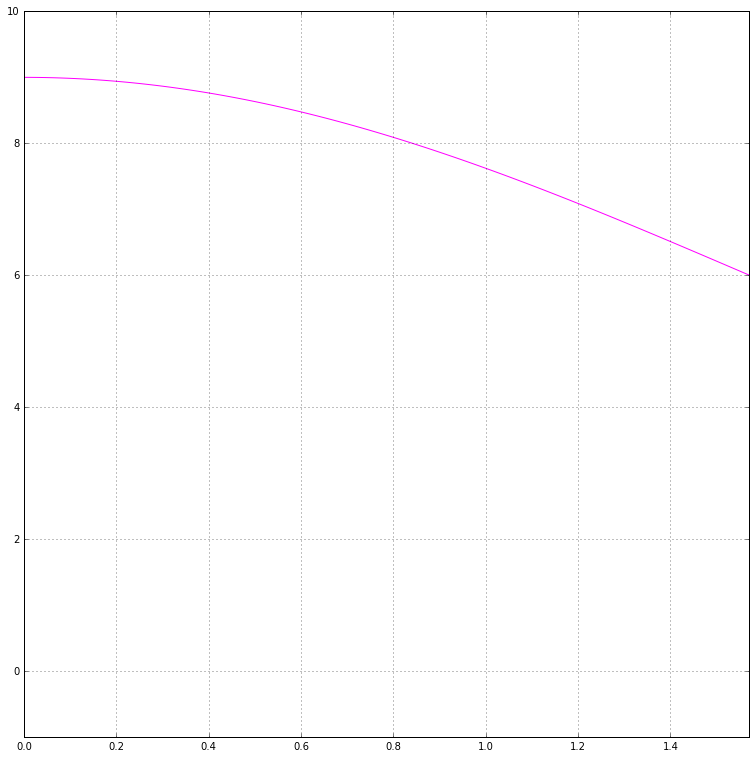

In [8]:
plt.figure(figsize=(13,13))
x = np.linspace(0,math.pi/2,100).tolist()
y = [3*math.cos(i) + 6 for i in x]
plt.plot(x,y, color='magenta')
plt.axis([0,math.pi/2,-1,10])
plt.grid()

# (a) solução analítica

<img src="cotes.PNG">

# Resultado analítico:

In [9]:
resultado = 3*math.pi + 3
print(resultado)

12.42477796076938


# (b) uma única aplicação da regra do trapézio

In [10]:
res = trap(f,0,math.pi/2)
print(res)

11.780972450961723


## Erro relativo porcentual:

In [11]:
erro = math.fabs( (resultado - res)/resultado )*100
print(erro)

5.18162587565299


# (c) aplicação múltipla da regra do trapézio com n = 2

In [12]:
res = multiTrap(2,f,0,math.pi/2)
print(res)

12.268956307674939


## Erro relativo porcentual:

In [13]:
erro = math.fabs( (resultado - res)/resultado )*100
print(erro)

1.254120223205915


# aplicação múltipla da regra do trapézio com n = 4

In [14]:
res = multiTrap(4,f,0,math.pi/2)
print(res)

12.386125363687706


## Erro relativo porcentual:

In [15]:
erro = math.fabs( (resultado - res)/resultado )*100
print(erro)

0.3110928597977159


# (d) Uma aplicação da regra de Simpson 1/3

In [16]:
res = simpson(f,0,math.pi/2)
print(res)

12.43161759324601


## Erro relativo porcentual:

In [17]:
erro = math.fabs( (resultado - res)/resultado )*100
print(erro)

0.055048327609766884


# (e) Aplicação múltipla da regra de Simpson 1/3, com n = 4

In [18]:
res = multiSimpson(4,f,0,math.pi/2)
print(res)

12.425181715691961


## Erro relativo porcentual:

In [19]:
erro = math.fabs( (resultado - res)/resultado )*100
print(erro)

0.003249594671683854


# (f) Uma aplicação da regra 3/8 de Simpson 

In [20]:
res = simpson38(f,0,math.pi/2)
print(res)

12.427792730712216


## Erro relativo porcentual:

In [21]:
erro = math.fabs( (resultado - res)/resultado )*100
print(erro)

0.02426417560423115


# (g) Aplicação múltipla da regra de Simpson, com n = 5 (Uma aplicação de Simpson 1/3 e uma aplicação de Simpson 3/8)

## Serão necessários 6 pontos (para 5 intervalos), a e b e mais 4 pontos interiores.

In [27]:
res = simpson38(f,0,3*math.pi/10) 
print(res)
res += simpson(f,3*math.pi/10,math.pi/2)
print(res)

8.08222038459913
12.42511195970102


## Erro relativo porcentual:

In [25]:
erro = math.fabs( (resultado - res)/resultado )*100
print(erro)

0.0026881682127074032


## Dessa maneira, é possível concluir que é melhor colocar Simpson 1/3 no primeiro intervalo e Simpson 3/8 no segundo intervalo, pois assim o erro relativo porcentual fica menor.

## Analisando todos os métodos, o método com o menor erro foi obtido pela aplicação múltipla da regra de Simpson 1/3 com a regra de Simpson 3/8.